In [1093]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

Cargamos las imágenes

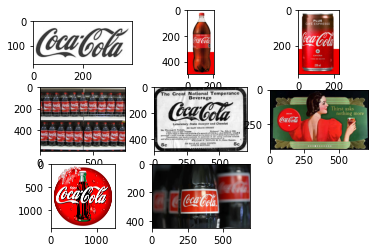

In [1094]:
# Cargamos la imagen a procesar
img_1 = cv.imread('images/coca_logo_1.png')
img_2 = cv.imread('images/coca_logo_2.png')
img_3 = cv.imread('images/coca_multi.png')
img_4 = cv.imread('images/coca_retro_1.png')
img_5 = cv.imread('images/coca_retro_2.png')
img_6 = cv.imread('images/COCA-COLA-LOGO.jpg')
img_7 = cv.imread('images/logo_1.png')

img_1_rgb= cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1_gray= cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
img_2_rgb= cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_2_gray= cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
img_3_rgb= cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_3_gray= cv.cvtColor(img_3, cv.COLOR_BGR2GRAY)
img_4_rgb= cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_4_gray= cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_5_rgb= cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_5_gray= cv.cvtColor(img_5, cv.COLOR_BGR2GRAY)
img_6_rgb= cv.cvtColor(img_6, cv.COLOR_BGR2RGB)
img_6_gray= cv.cvtColor(img_6, cv.COLOR_BGR2GRAY)
img_7_rgb= cv.cvtColor(img_7, cv.COLOR_BGR2RGB)
img_7_gray= cv.cvtColor(img_7, cv.COLOR_BGR2GRAY)

template = cv.imread('template/pattern.png',0)

plt.figure()
plt.subplot(3,3,1)
plt.imshow(template, cmap='gray')
plt.subplot(3,3,2)
plt.imshow(img_1_rgb)
plt.subplot(3,3,3)
plt.imshow(img_2_rgb)
plt.subplot(3,3,4)
plt.imshow(img_3_rgb)
plt.subplot(3,3,5)
plt.imshow(img_4_rgb)
plt.subplot(3,3,6)
plt.imshow(img_5_rgb)
plt.subplot(3,3,7)
plt.imshow(img_6_rgb)
plt.subplot(3,3,8)
plt.imshow(img_7_rgb)

In [1095]:
images_dict = {
    "image_1": img_1_rgb, 
    "image_2": img_2_rgb, 
    "image_3": img_3_rgb, 
    "image_4": img_4_rgb, 
    "image_5": img_5_rgb,
    "image_6": img_6_rgb,
    "image_7": img_7_rgb
}

Ejercicio 1 - Obtener una detección del logo para cada imagen

In [1096]:
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv.pyrDown(lower)
        gaussian_pyr.append(lower)
    return gaussian_pyr


In [1097]:
def scales_pyramid(img, begin, end):
    print(f'Tamaño original: {img.shape}')
    img_to_scale = img.copy()
    scales = np.linspace(begin, end, 5)
    resized_imgs = list()

    # generamos nuestra "piramide" de tamaños arbitrarios
    print(f'Dimensiones generadas:')
    for scale in scales:
        resized_imgs.append(cv.resize(img_to_scale, None, fx=scale, fy=scale))
        print(resized_imgs[-1].shape)

    return resized_imgs

In [1098]:
def template_grey_value():
    average = (int) (np.average(template[93:98,55:67].flatten()))
    return average

Imagen 1

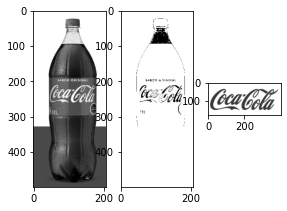

In [1099]:
img_aux = img_1_gray.copy()

plt.imshow(template, cmap='gray')
img_aux[img_1_gray > 180] = template_grey_value()
img_aux[img_1_gray < 180] = 190
img_aux[img_1_gray > 240] = 190

# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_1_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(template, cmap='gray')

In [1100]:
pyramid = scales_pyramid(img_aux, 1.7, 2.5)

Tamaño original: (500, 207)
Dimensiones generadas:
(850, 352)
(950, 393)
(1050, 435)
(1150, 476)
(1250, 518)


In [1101]:
best_image_1 = pyramid[4]

Imagen 2

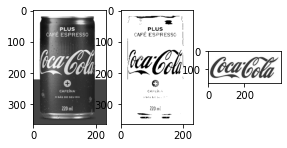

In [1102]:
img_aux = img_2_gray.copy()

plt.imshow(template, cmap='gray')
img_aux[img_2_gray > 190] = template_grey_value()
img_aux[img_2_gray < 180] = 220
img_aux[img_2_gray > 250] = 220

average = (int) (np.average(img_2_gray[300:305,0:5].flatten()))

img_aux[img_2_gray == average] = 220

# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_2_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(template, cmap='gray')


In [1103]:
pyramid = scales_pyramid(img_aux, 1.8, 2.1)

Tamaño original: (363, 233)
Dimensiones generadas:
(653, 419)
(681, 437)
(708, 454)
(735, 472)
(762, 489)


In [1104]:
best_image_2 = pyramid[2]

Imagen 3

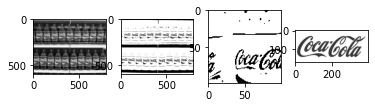

In [1105]:
img_aux = img_3_gray.copy()

plt.imshow(template, cmap='gray')
gray = template_grey_value()
img_aux[img_3_gray > 180] = gray
img_aux[img_3_gray < 180] = 180


# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_3_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(img_aux[100:200,0:100], cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

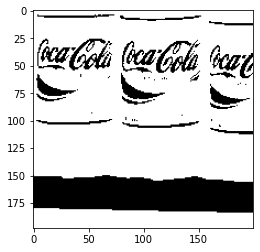

In [1106]:
plt.imshow(img_aux[400:,0:200], cmap='gray')

Template shape: (175, 400)
Tamaño original: (598, 799)
Dimensiones generadas:
(1196, 1598)
(1495, 1998)
(1794, 2397)
(2093, 2796)
(2392, 3196)
Indice: 0
Shape: (1196, 1598)
Indice: 1
Shape: (1495, 1998)
Indice: 2
Shape: (1794, 2397)
Indice: 3
Shape: (2093, 2796)
Indice: 4
Shape: (2392, 3196)


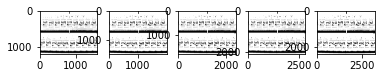

In [1107]:
print("Template shape: " + str(template.shape))
pyramid = scales_pyramid(img_aux, 2,4)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))


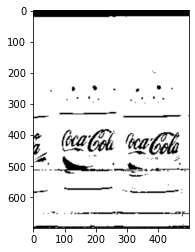

In [1108]:
plt.imshow(pyramid[1][0:700,0:500], cmap='gray')

In [1109]:
best_image_3 = pyramid[4]

Imagen 4

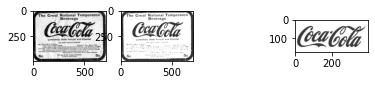

In [1110]:
img_aux = img_4_gray.copy()

plt.imshow(template, cmap='gray')
gray = template_grey_value()
img_aux[img_4_gray < 100] = gray
img_aux[img_4_gray > 100] = 255
#img_aux[img_4_gray < 180] = 180


# img_aux = img_aux[0:300,0:200]

plt.subplot(1,4,1)
plt.imshow(img_4_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

Template shape: (175, 400)
Tamaño original: (493, 715)
Dimensiones generadas:
(345, 500)
(382, 554)
(419, 608)
(456, 661)
(493, 715)
Indice: 0
Shape: (493, 715)
Indice: 1
Shape: (247, 358)
Indice: 2
Shape: (124, 179)
Indice: 3
Shape: (62, 90)


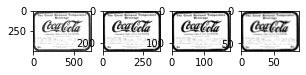

In [1111]:
print("Template shape: " + str(template.shape))
gaussian = gaussian_pyramid(img_aux, 3)
pyramid = scales_pyramid(img_aux, 0.7,1)
size = len(pyramid)
for i,image in enumerate(gaussian):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))


best_image_4 = pyramid[1]

Imagen 5

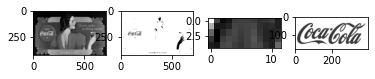

In [1112]:
img_aux = img_5_gray.copy()

gray = template_grey_value()
plt.imshow(template, cmap='gray')
img_aux[img_5_gray > 200] = gray
img_aux[img_5_gray < 200] = 255

plt.subplot(1,4,1)
plt.imshow(img_5_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,3)
plt.imshow(template[93:98,55:67], cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

Tamaño original: (429, 715)
Dimensiones generadas:
(644, 1072)
(804, 1341)
(965, 1609)
(1126, 1877)
(1287, 2145)
Indice: 0
Shape: (644, 1072)
Indice: 1
Shape: (804, 1341)
Indice: 2
Shape: (965, 1609)
Indice: 3
Shape: (1126, 1877)
Indice: 4
Shape: (1287, 2145)


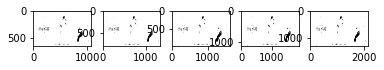

In [1113]:
pyramid = scales_pyramid(img_aux, 1.5,3)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))

In [1114]:
best_image_5 = pyramid[3]

Imagen 6

Pre procesamiento de color

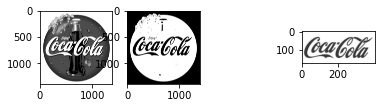

In [1115]:
img_aux = img_6_gray.copy()

gray = template_grey_value()
plt.imshow(template, cmap='gray')
img_aux[img_6_gray > 250] = gray
img_aux[img_6_gray < 250] = 255

plt.subplot(1,4,1)
plt.imshow(img_6_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

Pre procesamiento de escala

Tamaño original: (1389, 1389)
Dimensiones generadas:
(486, 486)
(521, 521)
(556, 556)
(590, 590)
(625, 625)
Indice: 0
Shape: (486, 486)
Indice: 1
Shape: (521, 521)
Indice: 2
Shape: (556, 556)
Indice: 3
Shape: (590, 590)
Indice: 4
Shape: (625, 625)


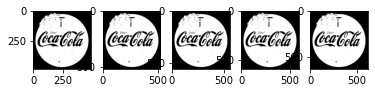

In [1116]:
pyramid = scales_pyramid(img_aux, 0.35,0.45)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))


best_image_6 = pyramid[0]

Imagen 7

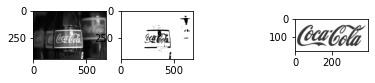

In [1117]:
img_aux = img_7_gray.copy()

gray = template_grey_value()
plt.imshow(template, cmap='gray')
umbral = 160
img_aux[img_7_gray > umbral] = gray
img_aux[img_7_gray < umbral] = 255
img_aux[img_7_gray > 246] = 255

plt.subplot(1,4,1)
plt.imshow(img_7_gray, cmap='gray')

plt.subplot(1,4,2)
plt.imshow(img_aux, cmap='gray')

plt.subplot(1,4,4)
plt.imshow(template, cmap='gray')

Tamaño original: (450, 687)
Dimensiones generadas:
(540, 824)
(574, 876)
(608, 927)
(641, 979)
(675, 1030)
Indice: 0
Shape: (540, 824)
Indice: 1
Shape: (574, 876)
Indice: 2
Shape: (608, 927)
Indice: 3
Shape: (641, 979)
Indice: 4
Shape: (675, 1030)


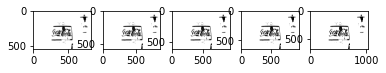

In [1118]:
pyramid = scales_pyramid(img_aux, 1.2,1.5)
size = len(pyramid)
for i,image in enumerate(pyramid):
    plt.subplot(1,size,i+1)
    plt.imshow(image, cmap='gray')
    print("Indice: " + str(i))
    print("Shape: " + str(image.shape))

In [1119]:
best_image_7 = pyramid[3]

Detección del logo sin falsos positivos

Nivel de confianza: 0.47


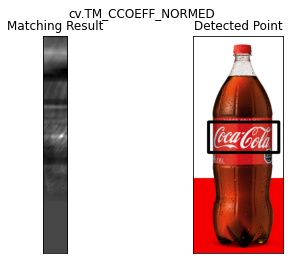

Nivel de confianza: 0.26


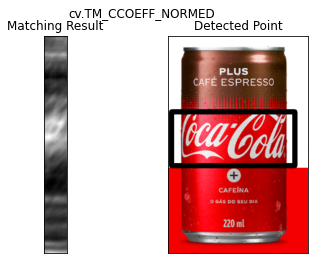

Nivel de confianza: 0.57


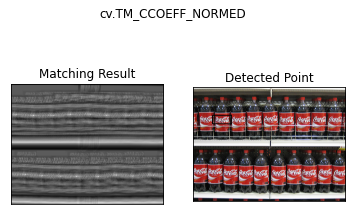

Nivel de confianza: 0.60


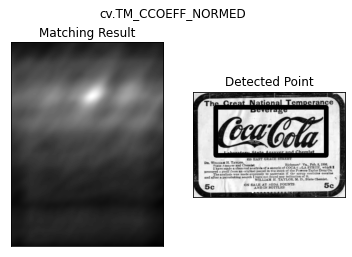

Nivel de confianza: 0.63


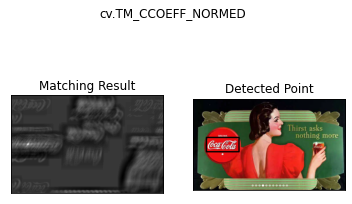

Nivel de confianza: 0.42


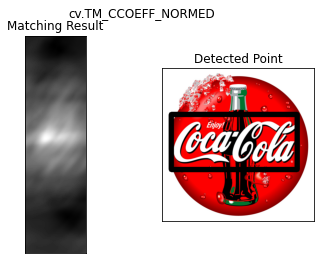

Nivel de confianza: 0.44


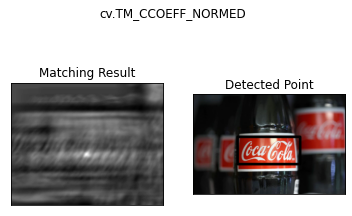

In [1131]:
w, h = template.shape[::-1]
# Método que dió mejor resultado posibles para comparación:
methods = ['cv.TM_CCOEFF_NORMED']
images = {
    "image_1": best_image_1, 
    "image_2": best_image_2, 
    "image_3": best_image_3, 
    "image_4": best_image_4, 
    "image_5": best_image_5,
    "image_6": best_image_6,
    "image_7": best_image_7
}

for name, img in images.items():
    for meth in methods:
        img_salida = cv.resize(images_dict[name], [img.shape[1],img.shape[0]], interpolation = cv.INTER_AREA)
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img, template, method)
        
        # Encontramos los valores máximos y mínimos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        top_left = max_loc
        
        print("Nivel de confianza: " + str("{:.2f}".format(max_val)))

        # Marcamos el lugar donde lo haya encontrado
        #----------------------------------------
        bottom_right = (top_left[0] + w, top_left[1] + h)


        cv.rectangle(img_salida,top_left, bottom_right, 0, 15)
        
        # Graficamos el procesamiento y la salida
        #----------------------------------------
        
        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        img_salida = cv.cvtColor(img_salida,cv.COLOR_BGR2RGB)
        file_name = 'output/simple_match/' + name + '_output.png'
        cv.imwrite(file_name,img_salida)

        plt.suptitle(meth)
        plt.show()

Ejercicio 2

Multiples detecciones

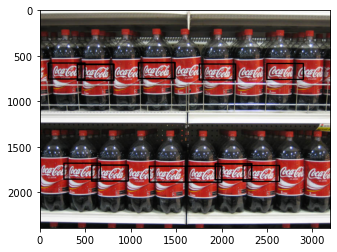

In [1123]:
img_gray = best_image_3.copy()
template = template.copy()
output = cv.resize(images_dict['image_3'], [img_gray.shape[1],img_gray.shape[0]], interpolation = cv.INTER_AREA)

w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
# Fijamos un umbral de "coincidencia"
threshold = 0.50


loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv.rectangle(output, pt, (pt[0] + w, pt[1] + h), (0), 10)

cv.imwrite('multiple_matching.png',output)
plt.imshow(output,cmap = 'gray')

Ejercicio 3

Multiple Matching para todas las imagenes

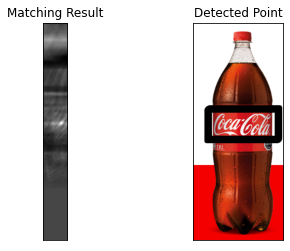

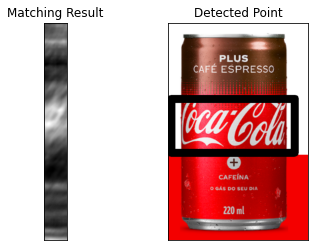

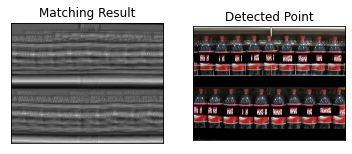

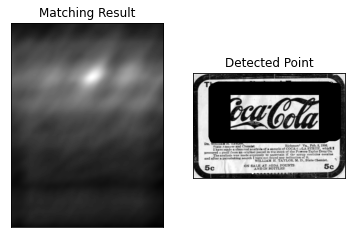

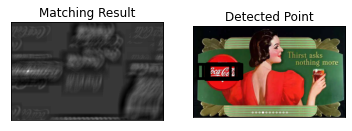

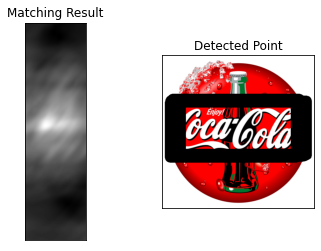

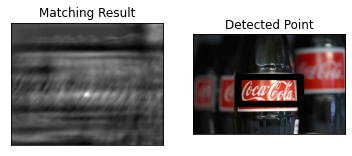

In [1130]:
w, h = template.shape[::-1]
methods = ['cv.TM_CCOEFF_NORMED']
images = {
    "image_1": best_image_1, 
    "image_2": best_image_2, 
    "image_3": best_image_3, 
    "image_4": best_image_4, 
    "image_5": best_image_5,
    "image_6": best_image_6,
    "image_7": best_image_7
}

for name, img in images.items():
    for meth in methods:
        # Hago una copia de la imagen porque ciclo a ciclo le dibujo rectángulos
        img_salida = cv.resize(images_dict[name], [img.shape[1],img.shape[0]], interpolation = cv.INTER_AREA)
        method = eval(meth)
        
        # Aplicamos la coincidencia de patrones
        #--------------------------------------
        res = cv.matchTemplate(img, template, method)
        
        # Fijamos un umbral de "coincidencia"
        threshold = 0.25


        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
            cv.rectangle(img_salida, pt, (pt[0] + w, pt[1] + h), (0), 20)


        # Resultado de coincidencia
        plt.subplot(121),plt.imshow(res,cmap = 'gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Imagen original con recuadros
        plt.subplot(122),plt.imshow(img_salida)
        img_salida = cv.cvtColor(img_salida,cv.COLOR_BGR2RGB)
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
        file_name = 'output/multiple_match/' + name + '_output.png'
        cv.imwrite(file_name,img_salida)
        plt.show()